# CryptoHack_Mathematics

This category covers more advanced cryptographic math. It's not necessary to solve these before moving to the Block Cipher and RSA sections. However, the first challenges will expand your modular toolbox, while the later ones are reported to be among the most satisfying puzzles to solve on CryptoHack. There are 22 challenges.

# Modular Math
## Quadratic Residues

We've looked at multiplication and division in modular arithmetic, but what does it mean to take the square root modulo an integer?

For the following discussion, let's work modulo $p = 29$. We can take the integer $a = 11$ and calculate $a^2 = 5\ mod\ 29$.

As $a = 11$, $a^2 = 5$, we say the square root of 5 is 11.

This feels good, but now let's think about the square root of 18. From the above, we know we need to find some integer a such that $a^2 = 18$

Your first idea might be to start with $a = 1$ and loop to $a = p-1$. In this discussion p isn't too large and we can quickly look.

Have a go, try coding this and see what you find. If you've coded it right, you'll find that for all $a ∈ F_p^*$ you never find an a such that $a^2 = 18$.

What we are seeing, is that for the elements of $F_p^*$, not every element has a square root. In fact, what we find is that for roughly one half of the elements of $F_p^*$, there is no square root.

We say that an integer $x$ is a Quadratic Residue if there exists an $a$ such that $a^2 = x\ mod\ p$. If there is no such solution, then the integer is a Quadratic Non-Residue.

In other words, $x$ is a quadratic residue when it is possible to take the square root of $x$ modulo an integer $p$.

In the below list there are two non-quadratic residues and one quadratic residue.

Find the quadratic residue and then calculate its square root. Of the two possible roots, submit the smaller one as the flag.

If $a^2 = x$ then $(-a)^2 = x$. So if $x$ is a quadratic residue in some finite field, then there are always two solutions for $a$.

```
p = 29
ints = [14, 6, 11] 
```

In [1]:
squares=[(x,x**2%29) for x in range(29)]
for item in squares:
    if item[1]==6:
        print(item)

(8, 6)
(21, 6)


So the smaller quadratic residue is 8. On to the next one!
## Legendre Symbol

In Quadratic Residues we learnt what it means to take the square root modulo an integer. We also saw that taking a root isn't always possible.

In the previous case when $p = 29$, even the simplest method of calculating the square root was fast enough, but as p gets larger, this method becomes wildly unreasonable.

Lucky for us, we have a way to check whether an integer is a quadratic residue with a single calculation thanks to Legendre. In the following, we will assume we are working modulo a prime $p$.

Before looking at Legendre's symbol, let's take a brief detour to see an interesting property of quadratic (non-)residues.

```
Quadratic Residue * Quadratic Residue = Quadratic Residue
Quadratic Residue * Quadratic Non-residue = Quadratic Non-residue
Quadratic Non-residue * Quadratic Non-residue = Quadratic Residue 
```
So what's the trick? The Legendre Symbol gives an efficient way to determine whether an integer is a quadratic residue modulo an odd prime p.

Legendre's Symbol: $(a / p) ≡ a^{(p-1)/2}$ mod p obeys:
```
(a / p) = 1 if a is a quadratic residue and a ≢ 0 mod p
(a / p) = -1 if a is a quadratic non-residue mod p
(a / p) = 0 if a ≡ 0 mod p 
```
Which means given any integer a, calculating `pow(a,(p-1)/2,p)` is enough to determine if a is a quadratic residue.

Now for the flag. Given the following 1024 bit prime and 10 integers, find the quadratic residue and then calculate its square root; the square root is your flag. Of the two possible roots, submit the larger one as your answer.

output.txt

In [2]:
with open("output_legendre.txt") as f: 
    lines = f.readlines()  

In [3]:
p=int(lines[0].strip('p =\n'))
p

101524035174539890485408575671085261788758965189060164484385690801466167356667036677932998889725476582421738788500738738503134356158197247473850273565349249573867251280253564698939768700489401960767007716413932851838937641880157263936985954881657889497583485535527613578457628399173971810541670838543309159139

In [4]:
int_list=[int(x) for x in lines[2].strip("ints =\n[]").split(',')]

In [5]:
quadr_res = [n for n in int_list if pow(n, (p-1)//2, p)==1][0]

Now that we have the quadratic residue, given that the prime is $p\equiv3\ mod\ 4$, we can find the square root. If $a$ is a quadratic residue, then according to [Euler's Criterion](https://en.wikipedia.org/wiki/Euler%27s_criterion)
$$a^{(p-1)/2}\equiv1\ mod\ p$$
It follows then that
$$a^{(p+1)/2}\equiv a^{(p-1)/2}a^{(p+1)/2}\equiv a^{\frac{(p-1)+(p+1)}{2}}\equiv a^p\equiv a\ mod\ p,$$ where the last equality follows from [Fermat's Little Theorem](https://en.wikipedia.org/wiki/Fermat%27s_little_theorem). Then since we know that $p\equiv 3 mod 4$, i.e. $p=4\cdot k+3$, it follows that $(p+1)/4$ is an integer. So, finally we have
$$(a^{(p+1)/4})^2\equiv a^{(p+1)/2}\equiv a\ mod\ p.$$ So, the aquare root is...

In [6]:
pow(quadr_res, (p+1)//4, p)

93291799125366706806545638475797430512104976066103610269938025709952247020061090804870186195285998727680200979853848718589126765742550855954805290253592144209552123062161458584575060939481368210688629862036958857604707468372384278049741369153506182660264876115428251983455344219194133033177700490981696141526

On to the next one!
## Modular Square Root
In Legendre Symbol we introduced a fast way to determine whether a number is a square root modulo a prime. We can go further: there are algorithms for efficiently calculating such roots. The best one in practice is called Tonelli-Shanks, which gets its funny name from the fact that it was first described by an Italian in the 19th century and rediscovered independently by Daniel Shanks in the 1970s.

All primes that aren't 2 are of the form `p ≡ 1 mod 4` or `p ≡ 3 mod 4`, since all odd numbers obey these congruences. As the previous challenge hinted, in the p ≡ 3 mod 4 case, a really simple formula for computing square roots can be derived directly from Fermat's little theorem. That leaves us still with the `p ≡ 1 mod 4` case, so a more general algorithm is required.

In a congruence of the form `r^2 ≡ a mod p`, Tonelli-Shanks calculates r.

The main use-case for this algorithm is finding elliptic curve co-ordinates. Its operation is somewhat complex so we're not going to discuss the details, however, implementations are easy to find and Sage has one built-in.

Find the square root of a modulo the 2048-bit prime p. Give the smaller of the two roots as your answer.

output.txt

In [7]:
with open("output_modular.txt") as f: 
    lines = f.readlines()

In [8]:
a=int(lines[0].strip('a =\n'))
p=int(lines[1].strip('p =\n'))

The following is an implementation of the Tonelli-Shanks theorem in python from [Svetlin Nakov](https://gist.github.com/nakov/60d62bdf4067ea72b7832ce9f71ae079)

In [9]:
def modular_sqrt(a, p):

    def legendre_symbol(a, p):
        """ Compute the Legendre symbol a|p using
            Euler's criterion. p is a prime, a is
            relatively prime to p (if p divides
            a, then a|p = 0)
            Returns 1 if a has a square root modulo
            p, -1 otherwise.
        """
        ls = pow(a, (p - 1) // 2, p)
        return -1 if ls == p - 1 else ls

    """ Find a quadratic residue (mod p) of 'a'. p
        must be an odd prime.
        Solve the congruence of the form:
            x^2 = a (mod p)
        And returns x. Note that p - x is also a root.
        0 is returned is no square root exists for
        these a and p.
        The Tonelli-Shanks algorithm is used (except
        for some simple cases in which the solution
        is known from an identity). This algorithm
        runs in polynomial time (unless the
        generalized Riemann hypothesis is false).
    """
    # Simple cases
    #
    if legendre_symbol(a, p) != 1:
        return 0
    elif a == 0:
        return 0
    elif p == 2:
        return p
    elif p % 4 == 3:
        return pow(a, (p + 1) // 4, p)

    # Partition p-1 to s * 2^e for an odd s (i.e.
    # reduce all the powers of 2 from p-1)
    #
    s = p - 1
    e = 0
    while s % 2 == 0:
        s //= 2
        e += 1

    # Find some 'n' with a legendre symbol n|p = -1.
    # Shouldn't take long.
    #
    n = 2
    while legendre_symbol(n, p) != -1:
        n += 1

    # Here be dragons!
    # Read the paper "Square roots from 1; 24, 51,
    # 10 to Dan Shanks" by Ezra Brown for more
    # information
    #

    # x is a guess of the square root that gets better
    # with each iteration.
    # b is the "fudge factor" - by how much we're off
    # with the guess. The invariant x^2 = ab (mod p)
    # is maintained throughout the loop.
    # g is used for successive powers of n to update
    # both a and b
    # r is the exponent - decreases with each update
    #
    x = pow(a, (s + 1) // 2, p)
    b = pow(a, s, p)
    g = pow(n, s, p)
    r = e

    while True:
        t = b
        m = 0
        for m in range(r):
            if t == 1:
                break
            t = pow(t, 2, p)

        if m == 0:
            return x

        gs = pow(g, 2 ** (r - m - 1), p)
        g = (gs * gs) % p
        x = (x * gs) % p
        b = (b * g) % p
        r = m

In [10]:
modular_sqrt(a, p)

2362339307683048638327773298580489298932137505520500388338271052053734747862351779647314176817953359071871560041125289919247146074907151612762640868199621186559522068338032600991311882224016021222672243139362180461232646732465848840425458257930887856583379600967761738596782877851318489355679822813155123045705285112099448146426755110160002515592418850432103641815811071548456284263507805589445073657565381850521367969675699760755310784623577076440037747681760302434924932113640061738777601194622244192758024180853916244427254065441962557282572849162772740798989647948645207349737457445440405057156897508368531939120

On to the next one!
## Chinese Remainder Theorem
The Chinese Remainder Theorem gives a unique solution to a set of linear congruences if their moduli are coprime.

This means, that given a set of arbitrary integers a<sub>i</sub>, and pairwise coprime integers n<sub>i</sub>, such that the following linear congruences hold:
```
x ≡ a1 mod n1
x ≡ a2 mod n2
...
x ≡ an mod nn
```

There is a unique solution `x ≡ a mod N` where `N = n1 * n2 * ... * nn`.

In cryptography, we commonly use the Chinese Remainder Theorem to help us reduce a problem of very large integers into a set of several, easier problems.

Given the following set of linear congruences:
```
x ≡ 2 mod 5
x ≡ 3 mod 11
x ≡ 5 mod 17 
```
Find the integer a such that `x ≡ a mod 935`

Starting with the congruence with the largest modulus, use that for `x ≡ a mod p` we can write `x = a + k*p` for arbitrary integer `k`.

In [11]:
from functools import reduce

def chinese_remainder(n, a):
    sum = 0
    prod = reduce(lambda a, b: a*b, n)
    for n_i, a_i in zip(n,a):
        p = prod/n_i
        sum += a_i * mul_inv(p, n_i) * p
    return sum % prod
    
def mul_inv(a, b):
    b0 = b
    x0, x1 = 0,1
    if b == 1:
        return 1
    while a > 1:
        q = a // b
        a , b = b, a%b
        x0, x1 = x1 -q*x0, x0
    if x1 < 0:
        x1 += b0
    return x1

a = [2,3,5] # x = a mod x
n = [5,11,17] # x = x mod n


print(chinese_remainder(n,a))

872.0


On to the next section!
# Lattices
## Vectors

Before defining a lattice or talking about how lattices appear in cryptography, let's review some of the basics of linear algebra. The following challenges should be considered as revision, if this is totally new to you, you might need to do a bit of background reading. As usual, we recommend "An Introduction to Mathematical Cryptography" by Hoffstein, Pipher, Silverman, as well as this excellent introduction to lattices and their applications.

A vector space V over a field F is a set defined with two binary operators. For a vector v ∈ V, and a scalar a ∈ F, vector addition takes two vectors and produces another vector: v + w = z, for v,w,z ∈ V and scalar multiplication takes a vector and a scalar and produces a vector: a*v = w, for v,w ∈ V, a ∈ F.

You will probably have first seen vectors in the context of a two dimensional vector space defined over the reals. We'll use this here too as an example!

Let's consider a two dimensional vector space over the reals. A vector v ∈ V can be considered as a pair of numbers: v = (a,b) for a,b ∈ R. Vector addition works as v + w = (a,b) + (c,d) = (a+c, b+d), and scalar multiplication by c*v = c*(a,b) = (c*a, c*b).

One can also define the inner product (also called the dot product), which takes two vectors and returns a scalar. Formally we think of this as v ∙ w = a for v,w ∈ V, a ∈ F. In our two-dimensional example, the inner product works as v ∙ w = (a,b) ∙ (c,d) = a*c + b*d.

Time for the flag! Given a three dimensional vector space defined over the reals, where v = (2,6,3), w = (1,0,0) and u = (7,7,2), calculate 3*(2*v - w) ∙ 2*u.

Python contains the very useful library `numpy` for linear algebra computations!

In [12]:
import numpy as np

In [13]:
v=np.array([2,6,3])
w=np.array([1,0,0])
u=np.array([7,7,2])

In [14]:
np.dot(3*(2*v-w),2*u)

702

On to the next one!
## Size and Basis

We say a set of vectors v1, v2, ..., vk ∈ V are linearly independent if the only solution to the equation:
```
a1*v1 + a2*v2 + ... + ak*vk = 0
```
is for a1 = a2 = ... = ak = 0.

A basis is a set of linearly independent vectors v1, v2, ..., vn ∈ V such that any vector w ∈ V can be written as:
```
w = a1*v1 + a2*v2 + ... + ak*vn
```
The number of elements in the basis is also the dimension of the vector space.

We define the size of a vector, denoted ||v||, using the inner product of the vector with itself: $||v||^2 = v ∙ v$.

A basis is orthogonal if for a vector basis $v_1, v_2, ..., v_n ∈ V$, the inner product between any two different vectors is zero: v<sub>i</sub> ∙ v<sub>j</sub> = 0, i ≠ j.

A basis is orthonormal if it is orthogonal and ||vi|| = 1, for all i.

That's a lot of stuff, but we'll be needing it. Time for the flag. Given the vector v = (4, 6, 2, 5), calculate its size. 

In [15]:
x=np.array([4,6,2,5])
np.linalg.norm(x)

9.0

On to the next one!
## Gram-Schmidt Algorithm
In the last challenge we saw that there is a special kind of basis called an orthogonal basis. Given a basis v1, v2, ..., vn ∈ V for a vector space, the Gram-Schmidt algorithm calculates an orthogonal basis u1, u2, ..., un ∈ V.

In "An Introduction to Mathematical Cryptography", Jeffrey Hoffstein, Jill Pipher, Joseph H. Silverman, the Gram-Schmidt algorithm is given as:

Algorithm for Gram-Schmidt

u<sub>1</sub> = v<sub>1</sub>

Loop i = 2,3...,n

   Compute μ<sub>ij</sub> = v<sub>i</sub> ∙ u<sub>j</sub> / ||u<sub>j</sub>||2, 1 ≤ j < i.
   
   Set u<sub>i</sub> = v<sub>i</sub> - μ<sub>ij</sub> * u<sub>j</sub> (Sum over j for 1 ≤ j < i)
   
End Loop


To test your code, let's grab the flag. Given the following basis vectors:

v1 = (4,1,3,-1), v2 = (2,1,-3,4), v3 = (1,0,-2,7), v4 = (6, 2, 9, -5),

use the Gram-Schmidt algorithm to calculate an orthogonal basis. The flag is the float value of the second component of u4 to 5 significant figures.

Note that this algorithm doesn't create an orthonormal basis! It's a small change to implement this. Think about what you would have to change. If you're using someone else's algorithm and the flag is incorrect, this might be the issue. If everything seems good and you're still not having your answer accepted, check your rounding when you take 5.s.f. for the solution.

In [16]:
# Computes the projection of the vector v onto u
def proj(u,v):
    return (np.dot(u,v)/np.dot(u,u))*u

In [19]:
# gives back the gram-schmidt basis of a list of np.arrays
def gs(vec_list,norm=True):
    gs_basis=[vec_list[0]]
    ortho_basis=[vec_list[0]/np.linalg.norm(vec_list[0])]
    for i in range(1,len(vec_list)):
        v=vec_list[i]
        u=v-sum([proj(x,v) for x in gs_basis[:i]])        
        gs_basis.append(u)        
        ortho_basis.append(u/np.linalg.norm(u))
    if norm==True:
        return ortho_basis
    else:
        return gs_basis

In [20]:
vec_list=[np.array([4,1,3,-1]),np.array([2,1,-3,4]),np.array([1,0,-2,7]),np.array([6,2,9,-5])]

In [21]:
answer=gs(vec_list)
answer

[array([ 0.76980036,  0.19245009,  0.57735027, -0.19245009]),
 array([ 0.47808587,  0.21172374, -0.47125607,  0.710299  ]),
 array([-0.22709712, -0.32046806,  0.63223205,  0.66783961]),
 array([-0.3567467 ,  0.90301508,  0.21181835,  0.11148334])]

On to the next one!
## What's a Lattice
We're now ready to start talking about lattices. Given a set of linearly independent vectors v1, v2, ..., vn ∈ Rm, the lattice L generated by v1, v2, ..., vn is the set of linearly independent vectors v1, v2, ..., vn with integer coefficients.

$$L = {a_1*v_1 + a_2*v_2 + ... + a_k*v_k : a_1, a_2, ..., a_n ∈ Z}. $$
The basis for the lattice L is any set of independent vectors that generates L. The choice of basis is far from unique.

Using a basis, we can reach any point within the lattice with integer multiples of the basis vectors. The basis vectors also define the fundamental domain:

F(v1,...,vn) = {t1 v1 + t2 v2 + ... + tn vn : 0 ≤ ti < 1}.

As a two dimensional example, the fundamental domain is the parallelogram with sides u1 and u2.

We can calculate the volume of the fundamental domain from the basis vectors. As an example, let us take a two dimensional lattice with basis vectors v = (2,5), u = (3,1). Create a matrix A with rows corresponding to the basis vectors: A = [[2,5],[3,1]]. The volume of the fundamental domain is the magnitude of the determinant of A: Vol(F) = |det(A)| = |2*1 - 5*3| = |-13| = 13.

For the flag, calculate the volume of the fundamental domain with the basis vectors v1 = (6, 2, -3), v2 = (5, 1, 4), v3 = (2, 7, 1).

In [22]:
X=np.array([[6,2,-3],[5,1,4],[2,7,1]])
X

array([[ 6,  2, -3],
       [ 5,  1,  4],
       [ 2,  7,  1]])

In [23]:
round(abs(np.linalg.det(X)))

255.0

On to the next one!
## Gaussian Reduction

If you look closely enough, lattices start appearing everywhere in cryptography. Sometimes they appear through manipulation of a cryptosystem, breaking parameters which were not generated securely enough. The most famous example of this is Coppersmith's attack against RSA cryptography.

Lattices can also be used to build cryptographic protocols, whose security is based on two fundamental "hard" problems:

The Shortest Vector Problem (SVP): find the shortest non-zero vector in a lattice L. In other words, find the non-zero vector within v ∈ L such that ||v|| is minimised.

The Closest Vector Problem (CVP): Given a vector w ∈ R^m that is not in L, find the vector v ∈ L that is the closest to w, i.e. find the vector v ∈ L such that ||v - w|| is minimised.

The SVP is hard for a generic lattice, but for simple enough cases there are efficient algorithms to compute either a solution or an approximation for the SVP. When the dimension of the lattice is four or less, we can compute this exactly in polynomial time; for higher dimensions, we have to settle for an approximation.

Gauss developed his algorithm to find an optimal basis for a two-dimensional lattice given an arbitrary basis. Moreover, the output v1 of the algorithm is a shortest nonzero vector in L, and so solves the SVP.

For higher dimensions, there's a basis lattice reduction algorithm called the LLL algorithm, named after Lenstra, Lenstra and Lovász. If you play CTFs regularly, you'll already know about it. The LLL algorithm runs in polynomial time. For now though, lets stay in two dimensions.

Gauss's algorithm roughly works by subtracting multiples of one basis vector from the other until it's no longer possible to make them any smaller. As this works in two-dimensions, it's nice to visualise. Here's a description of the algorithm from "An Introduction to Mathematical Cryptography", Jeffrey Hoffstein, Jill Pipher, Joseph H. Silverman:

Algorithm for Gaussian Lattice Reduction
```
Loop
   (a) If ||v2|| < ||v1||, swap v1, v2
   (b) Compute m = ⌊ v1∙v2 / v1∙v1 ⌋
   (c) If m = 0, return v1, v2
   (d) v2 = v2 - m*v1
Continue Loop
```



Note the similarity to Euclid's GCD algorithm with the "swap" and "reduction" steps, and that we have to use the floor, as on a lattice we may only use integer coefficients for our basis vectors.

For the flag, take the two vectors v = (846835985, 9834798552), u = (87502093, 123094980) and by applying Gauss's algorithm, find the optimal basis. The flag is the inner product of the new basis vectors. 

In [24]:
v2=np.array([846835985, 9834798552],dtype='int64')
v1=np.array([87502093, 123094980],dtype='int64')

In [25]:
from math import floor

In [26]:
def gauss_red(v1,v2):
    while True:
        if np.linalg.norm(v2)<=np.linalg.norm(v1):
            dummy=v1
            v1=v2
            v2=dummy
        m=round(np.dot(v1,v2)/np.dot(v1,v1))
        if m==0:
            break
        v2=v2-m*v1
    return (v1,v2)        

In [27]:
[u1,u2]=gauss_red(v1,v2)

In [28]:
flag=np.dot(u1,u2)
flag

7410790865146880.0

On to the next one!
## Find the Lattice!
As we've seen, lattices contain hard problems which can form trapdoor functions for cryptosystems. We also find that in cryptanalysis, lattices can break cryptographic protocols which seem at first to be unrelated to lattices.

This challenge uses modular arithmetic to encrypt the flag, but hidden within the protocol is a two-dimensional lattice. We highly recommend spending time with this challenge and finding how you can break it with a lattice. This is a famous example with plenty of resources available, but knowing how to spot the lattice within a system is often the key to breaking it.

As a hint, you will be able to break this challenge using the Gaussian reduction from the previous challenge.

[source.py](https://github.com/sean-rogers-t/cryptohack/blob/master/source_findthelattice.py)

[output.txt](https://github.com/sean-rogers-t/cryptohack/blob/master/output_findthelattice.txt)

In [29]:
from Crypto.Util.number import getPrime, inverse, bytes_to_long, long_to_bytes
import random
import math

FLAG = b'crypto{?????????????????????}'


def gen_key():
    q = getPrime(512)
    upper_bound = int(math.sqrt(q // 2))
    lower_bound = int(math.sqrt(q // 4))
    f = random.randint(2, upper_bound)
    while True:
        g = random.randint(lower_bound, upper_bound)
        if math.gcd(f, g) == 1:
            break
    h = (inverse(f, q)*g) % q
    return (q, h), (f, g)


def encrypt(q, h, m):
    assert m < int(math.sqrt(q // 2))
    r = random.randint(2, int(math.sqrt(q // 2)))
    e = (r*h + m) % q
    return e


def decrypt(q, h, f, g, e):
    a = (f*e) % q
    m = (a*inverse(f, g)) % g
    return m


public, private = gen_key()
q, h = public
f, g = private

m = bytes_to_long(FLAG)
e = encrypt(q, h, m)

#print(f'Public key: {(q,h)}')
#print(f'Encrypted Flag: {e}')

### Congruential Public Key Cryptosystem
The congruential public key cryptosystem given in `source.py` above is very similiar to the example in $\S 6.1$ of "An Introduction to Mathematical Cryptography" by Hoffstein, Pipher, Silverman. We will describe it here more or less verbatim from Hoffstein, et al. 

The idea is that Alice chooses a large public prime $q$ and two private positive integers $f,\ g$ satisfying

$$f<\sqrt{q/2},\ \sqrt{q/4}<g<\sqrt{q/2},\ and\ gcd(f,g)=1$$

Then she computes the other part of the public key, h, the smallest positive congruence
$$h\equiv f^{-1}g\ mog\ q$$
The public key pair is $(q,h)$ and the private key pair is $(f,g)$. Bob, in posession of the public key pair, chooses a plaintext message $m$ and a random integer $r$ satisfying
$$0<m<\sqrt{q/4}\ \ and\ \ 0<r<\sqrt{q/2}$$

Bob can then compute the encrypted message,

$$e\equiv rh+m\ mod\ q$$

Alice can now decript the message with her private key (f,g). She computes

$$a\equiv fe mod q$$

and the computes

$$b\equiv f^{-1}a\ mod\ g.$$

Where $f^{-1}$ is the inverse modulo g. Note that the first computation $a$ satisfies

$$a\equiv fe\equiv f(rh+m)\equiv frf^{-1}g+fm\equiv rg + fm\ mod\ q$$

One can show that $rg+fm\ <\ q$, so the above congruence is really an equivalence of integers. Then alice can compute 

$$b\equiv f^{-1}a\equiv f^{-1}(rg+fm)\equiv m\ mod\ g$$

Since $m<\sqrt{q/4}<g$, the above congruence is actually an inequality and Alice has decrypted the message and recieved the original message $m$.

### Using lattices to break the above crypto system.

First note that the private keys$f$ and $g$ are much smaller than the public keys $q$ and $h$. The public keys are generally $\mathcal{O}(q)$ while the public keys are of size $\mathcal{O}(\sqrt{q})$. Now if an attacker can find positive integers $F$, and $G$ such that 

$$Fh\equiv G\ mod\ q\ \ \ with,\ \ F,\ G\ = \mathcal{O}(q)$$

Then its a good bet that $(F,G)$ is the private decryption key. So how can we find integers satisfying these conditions. If we rewrite the above condition, we have $Fh\ =\ G+qR$ for some integer $R$. Then in terms of the unknown suspected private key $(F,G)$ we have

$$F(1,h)\ -\ R(0,q)\ =\ (F,G)$$

So we have vectors $u=(1,h)$ and $v=(0,q)$ each of size $\mathcal{O}(q)$ and we want to find a integer linear combination $au+bv$ of length $\mathcal{O}(q)$. So we need to find a short nonzero vector in the lattice

$$L\ = \ \{au\ +\ bv\ :\ a,b\in\mathbb{Z}\}$$

Fortunately, we can use the Gaussian Reduction algorithm described in the problem above to find such a vector!

In [30]:
with open('output_findthelattice.txt') as file:
    lines=file.readlines()

In [31]:
lines

['Public key: (7638232120454925879231554234011842347641017888219021175304217358715878636183252433454896490677496516149889316745664606749499241420160898019203925115292257, 2163268902194560093843693572170199707501787797497998463462129592239973581462651622978282637513865274199374452805292639586264791317439029535926401109074800)\n',
 'Encrypted Flag: 5605696495253720664142881956908624307570671858477482119657436163663663844731169035682344974286379049123733356009125671924280312532755241162267269123486523\n']

In [32]:
pubkey=(7638232120454925879231554234011842347641017888219021175304217358715878636183252433454896490677496516149889316745664606749499241420160898019203925115292257, 2163268902194560093843693572170199707501787797497998463462129592239973581462651622978282637513865274199374452805292639586264791317439029535926401109074800)

In [33]:
q,h=pubkey

In [34]:
e=5605696495253720664142881956908624307570671858477482119657436163663663844731169035682344974286379049123733356009125671924280312532755241162267269123486523

The following gaussian reduction function will handle long ints better than the one given in the last problem.

In [35]:
from math import sqrt

#The vectors given
v = [846835985, 9834798552]
u = [87502093, 123094980]

#Find the size of the vector specified
def findSize(u):
	temp = 0
	for i in u:
		temp += pow(i,2)
	return sqrt(temp)

#Find the inner product of 2 vectors
def mult(a,b):
	temp = 0
	for i in range(2):
		temp += a[i]*b[i]
	return temp

#sub((a,b),(c,d)) = (a-c,b-d)
def sub(a,b):
	t = []
	for i in range(2):
		t.append(a[i]-b[i])
	return t

#The algorithm for the Gaussian Lattice Reduction 
def gaussianLatticeReduction(n1,n2):
	while(True):
		if findSize(n2) < findSize(n1):
			t = n2
			n2 = n1
			n1 = t
		m = int(mult(n1,n2)/mult(n1,n1))
		if m == 0:
			return n1,n2
		else:
			temp = [0,0]
			for i in range(2):
				temp[i] = m * n1[i]
			n2 = sub(n2,temp)

In [36]:
(f,g),(u1,u2)=gaussianLatticeReduction([1,pubkey[1]],[0,pubkey[0]])

Compute $a\equiv fe\ mod\ q$.

In [37]:
a=(f*e)%q

Now we compute $b\equiv f^{-1}a\ mod\ g$

In [38]:
b=(inverse(f,g)*a)%g

In [39]:
b

2681090278518926103596876336530260209472667687146599413889678415962493

In [40]:
long_to_bytes(b)

b'crypto{Gauss_lattice_attack!}'

On to the next one!

## Backpack Cryptography

I love this cryptosystem so much, I carry it everywhere in my backpack. To lighten the load, I make sure I don't pack anything with high densities.

[source.py](https://github.com/sean-rogers-t/cryptohack/blob/master/source_backpack.py)

[output.txt](https://github.com/sean-rogers-t/cryptohack/blob/master/output_backpack.txt)

Challenge contributed by VincBreaker

Here is the text of the source file

In [72]:
import random
from collections import namedtuple
import gmpy2
from Crypto.Util.number import isPrime, bytes_to_long, inverse, long_to_bytes

FLAG = b'crypto{??????????????????????????}'
PrivateKey = namedtuple("PrivateKey", ['b', 'r', 'q'])

def gen_private_key(size):
    s = 10000
    b = []
    for _ in range(size):
        ai = random.randint(s + 1, 2 * s)
        assert ai > sum(b)
        b.append(ai)
        s += ai
    while True:
        q = random.randint(2 * s, 32 * s)
        if isPrime(q):
            break
    r = random.randint(s, q)
    assert q > sum(b)
    assert gmpy2.gcd(q,r) == 1
    return PrivateKey(b, r, q)


def gen_public_key(private_key: PrivateKey):
    a = []
    for x in private_key.b:
        a.append((private_key.r * x) % private_key.q)
    return a


def encrypt(msg, public_key):
    assert len(msg) * 8 <= len(public_key)
    ct = 0
    msg = bytes_to_long(msg)
    for bi in public_key:
        ct += (msg & 1) * bi
        msg >>= 1
    return ct


def decrypt(ct, private_key: PrivateKey):
    ct = inverse(private_key.r, private_key.q) * ct % private_key.q
    msg = 0
    for i in range(len(private_key.b) - 1, -1, -1):
         if ct >= private_key.b[i]:
             msg |= 1 << i
             ct -= private_key.b[i]
    return long_to_bytes(msg)


private_key = gen_private_key(len(FLAG) * 8)
public_key = gen_public_key(private_key)
encrypted = encrypt(FLAG, public_key)
decrypted = decrypt(encrypted, private_key)
assert decrypted == FLAG

#print(f'Public key: {public_key}')
#print(f'Encrypted Flag: {encrypted}')

In [73]:
with open('output_backpack.txt') as file:
    lines=file.readlines()

In [74]:
lines

['Public key: [260288377891444370372615148009023640057294926547602419331406531383682223097787288755377467188515435381259752760746, 322734358011758862401399370931929863052553602421714393280581187496537763321855751120439457234561080720455397490349, 88092359256403564783665281993130133541226601877969436905267415353041909757324746080398461245281826552421872983184, 601684701300110945921036937572461050140352984401874675917155063594305583314408001377505387079690115000992094388032, 193814643850628739958152744041743058858484088269609293429408490294552345005365776962194365813796130165113184925621, 51510606914703888409341761261103125433754505248101513818740574350196563260563818621033222936301769697693287778876, 502702742677974540308798846750017003106263447846689040491266463798703222616320168069962523670400796196343460832764, 86989835783586738140883150201327374176124588410464188692884973334241681514702306716383785095564084499563152815246, 515511378187957676256419959601984383408150348796281656976955

Hmm we'll have to comback to this one!

## Probability
## Jack's Birthday Hash

Today is Jack's birthday, so he has designed his own cryptographic hash as a way to celebrate.

Reading up on the key components of hash functions, he's a little worried about the security of the `JACK11` hash.

Given any input data, `JACK11` has been designed to produce a deterministic bit array of length 11, which is sensitive to small changes using the avalanche effect.

Using `JACK11`, his secret has the hash value: `JACK(secret) = 01011001101`.

Given no other data of the `JACK11` hash algorithm, how many unique secrets would you expect to hash to have (on average) a 50% chance of a collision with Jack's secret?

In [41]:
hash_space_size=2**11

In [42]:
p=1/hash_space_size

In [43]:
p

0.00048828125

In [47]:
2**(12/2)*math.sqrt(0.5)

45.254833995939045

In [53]:
p=1/(2**11)

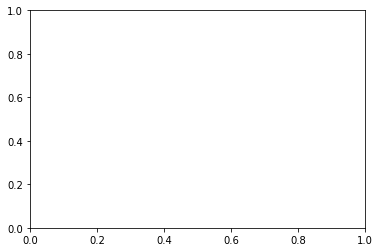

In [57]:
from scipy.stats import geom

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

In [58]:
mean, var, skew, kurt = geom.stats(p, moments='mvsk')

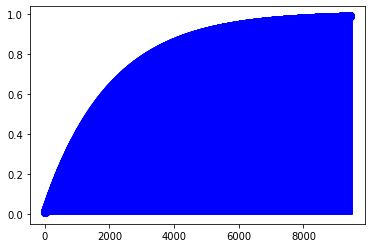

In [63]:
x = np.arange(geom.ppf(0.01, p),

              geom.ppf(0.99, p))
fig, ax = plt.subplots(1, 1)
ax.plot(x, geom.cdf(x, p), 'bo', ms=8, label='geom pmf')

ax.vlines(x, 0, geom.cdf(x, p), colors='b', lw=5, alpha=0.5)
plt.show()

## Jack's Birthday Confusion
The last computation has made Jack a little worried about the safety of his hash, and after doing some more research it seems there's a bigger problem.

Given no other data of the JACK11 hash algorithm, how many unique secrets would you expect to hash to have (on average) a 75% chance of a collision between two distinct secrets?

In [70]:
(2**(6)*math.sqrt(-math.log(1-0.75)))

75.35424144099038